<a href="https://colab.research.google.com/github/JOYCE1216/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [ ]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
df.isnull()
df.isna()

## 열별, 행별 결측치 개수 확인
print(df)
df.isnull().sum()
df.isnull().sum(axis=1) #행별로

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)]
df[df['나이'].isnull()]

## 결측치가 아닌 항목 확인
df.notnull()

## 결측치 비율
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100


    이름    나이    도시    점수
0  김철수  25.0    서울  90.0
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
3  최지훈  22.0    서울  80.0
4  정소희  35.0    대전  92.0


np.float64(15.0)

### 7-2 데이터 시각화를 이용한 결측치 찾기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#plt.rc('font', family='NanumBarunGothic')
#plt.rc('font', family='NanumGothic')

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 3. rcParams 설정을 통해 전역 폰트를 지정합니다.
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# `rm ~/.cache/matplotlib -rf` (리눅스/맥)

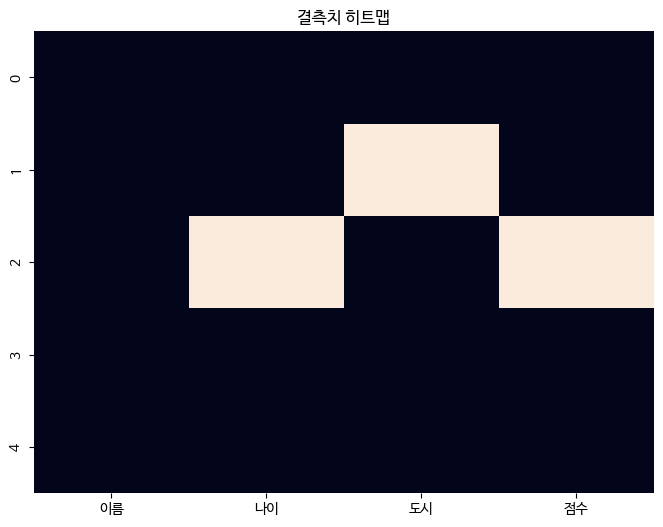

NameError: name 'msno' is not defined

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

In [ ]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
low_val = q1 - 1.5 * iqr
upp_val = q3 + 1.5 * iqr

### IQR 통계량 출력
print(q1);print(q3);print(low_val);print(upp_val)


63.25
85.0
30.625
117.625


### 7-4 Z-점수를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
avg_val = df['점수'].mean()
std_val = df['점수'].std()
df['점수_Z'] = (df['점수'] - avg_val)/ std_val
df['점수_Z']

### 임계값 설정 및 이상치 여부 판단
lim_val = 2
df['err_yn'] = df['점수_Z'].abs() > lim_val

### 이상치 데이터 출력
df[df['err_yn']]

### 이상치 비율 출력
df['err_yn'].mean() * 100

np.float64(12.5)

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1) # 결측치가 1개 이하인 경우만 남음. 2개 이상 삭제

### 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:,['나이','소득']] = df_cleaned[['나이','소득']].fillna(df_cleaned[['나이','소득']].mean())
df_cleaned

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:,['지출','평균구매횟수']] = df_cleaned[['지출','평균구매횟수']].interpolate(method='linear')
df_cleaned
df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


### 7-6 DataFrame 값 변경

In [ ]:
from ast import Lambda
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)
print(df)
### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul','서울')
df

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None:'미정', 'Incheon':'인천'})
df

### map을 이용한 값 변경
df = pd.DataFrame(data);print(df)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)
df['age_str'] = df['age'].map(lambda x: f" {x} 살" if pd.notna(x) else "알수없음")
df

### apply 함수를 이용한 값 변경
#print(df)
df['age_apply'] = df['age'].apply(lambda x:x*2 if pd.notna(x) else None)
#print(df)
### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row):
    age=row['age'] if pd.notna(row['age']) else 0
    score = row['score'] if pd.notna(row['score']) else 0
    return age + score

df['age_plus_score'] = df.apply(age_plus_score, axis=1) # row

### loc 인덱스를 이용한 값 변경
df.loc[df['score'] < 90, 'score'] = 90

### where 함수를 이용한 값 변경
df['age_where'] = df['age'].where(df['age']>= 30, other=0)
df



    age     city  score
0  25.0    Seoul   90.0
1  30.0     None   85.0
2   NaN  Incheon    NaN
3  22.0    Seoul   80.0
4  35.0  Daejeon   92.0
    age     city  score
0  25.0    Seoul   90.0
1  30.0     None   85.0
2   NaN  Incheon    NaN
3  22.0    Seoul   80.0
4  35.0  Daejeon   92.0


,age,city,score,age_str,age_apply,age_plus_score,age_where
0,25.0,서울특별시,90.0,25.0 살,50.0,115.0,0.0
1,30.0,미정,90.0,30.0 살,60.0,115.0,30.0
2,NaN,인천광역시,NaN,알수없음,NaN,0.0,0.0
3,22.0,서울특별시,90.0,22.0 살,44.0,102.0,0.0
4,35.0,대전광역시,92.0,35.0 살,70.0,127.0,35.0


### 7-7 날짜 데이터 타입 다루기


In [ ]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})
df_date

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
df_date
df_date.info()

### 날짜 데이터 분리
df_date['date'].dt.year
df_date['date'].dt.month
df_date['date'].dt.day
df_date['date'].dt.day_name()

### 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%Y/%m/%d')
df_date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date_str  3 non-null      object        
 1   date      3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes


,date_str,date,date_formatted
0,2025-07-01,2025-07-01,2025/07/01
1,2025-08-01,2025-08-01,2025/08/01
2,2025-09-01,2025-09-01,2025/09/01


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

### 데이터 분포 시각화

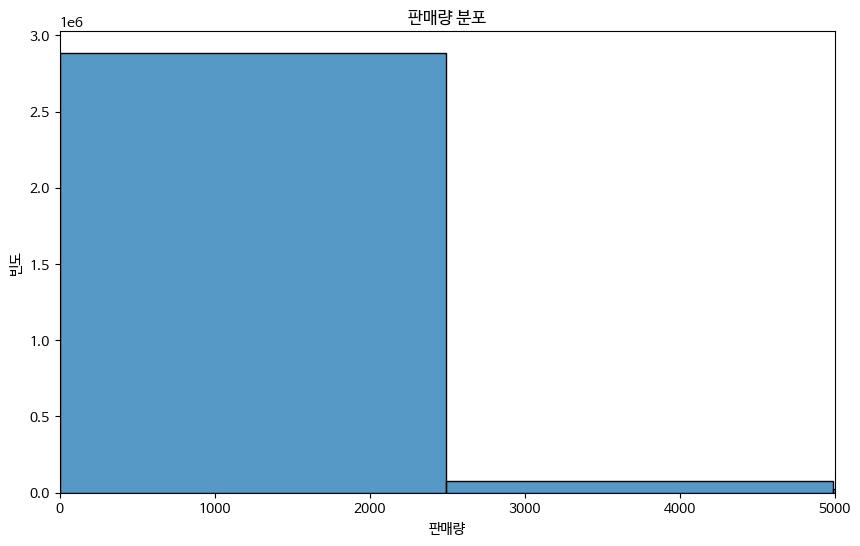

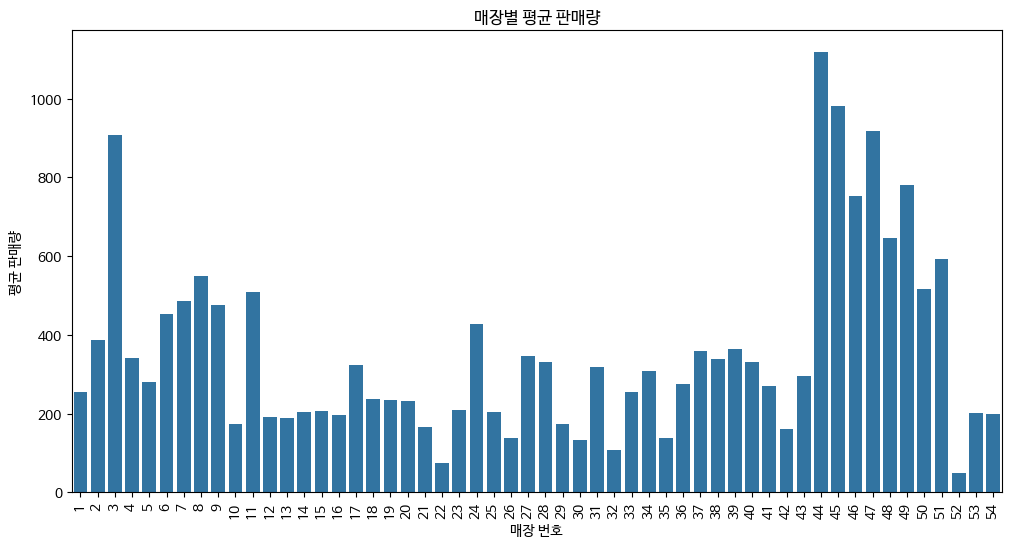

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

In [12]:
#import pandas as pd, numpy as np
train= pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


### 결측치 처리

In [10]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print(train.isnull().sum())
print(stores.isnull().sum())
print(transactions.isnull().sum())
print(oil.isnull().sum())
print(holidays_events.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date            0
store_nbr       0
transactions    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [45]:
plt.rc('font', family='NanumBarunGothic')

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

In [48]:
plt.rcParams['font.family'] = 'NanumBarunGothic' # NanumGothic을 사용 예시
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
font_name
print(fm.get_fontconfig_synthesis_path())

AttributeError: module 'matplotlib.font_manager' has no attribute 'get_fontconfig_synthesis_path'

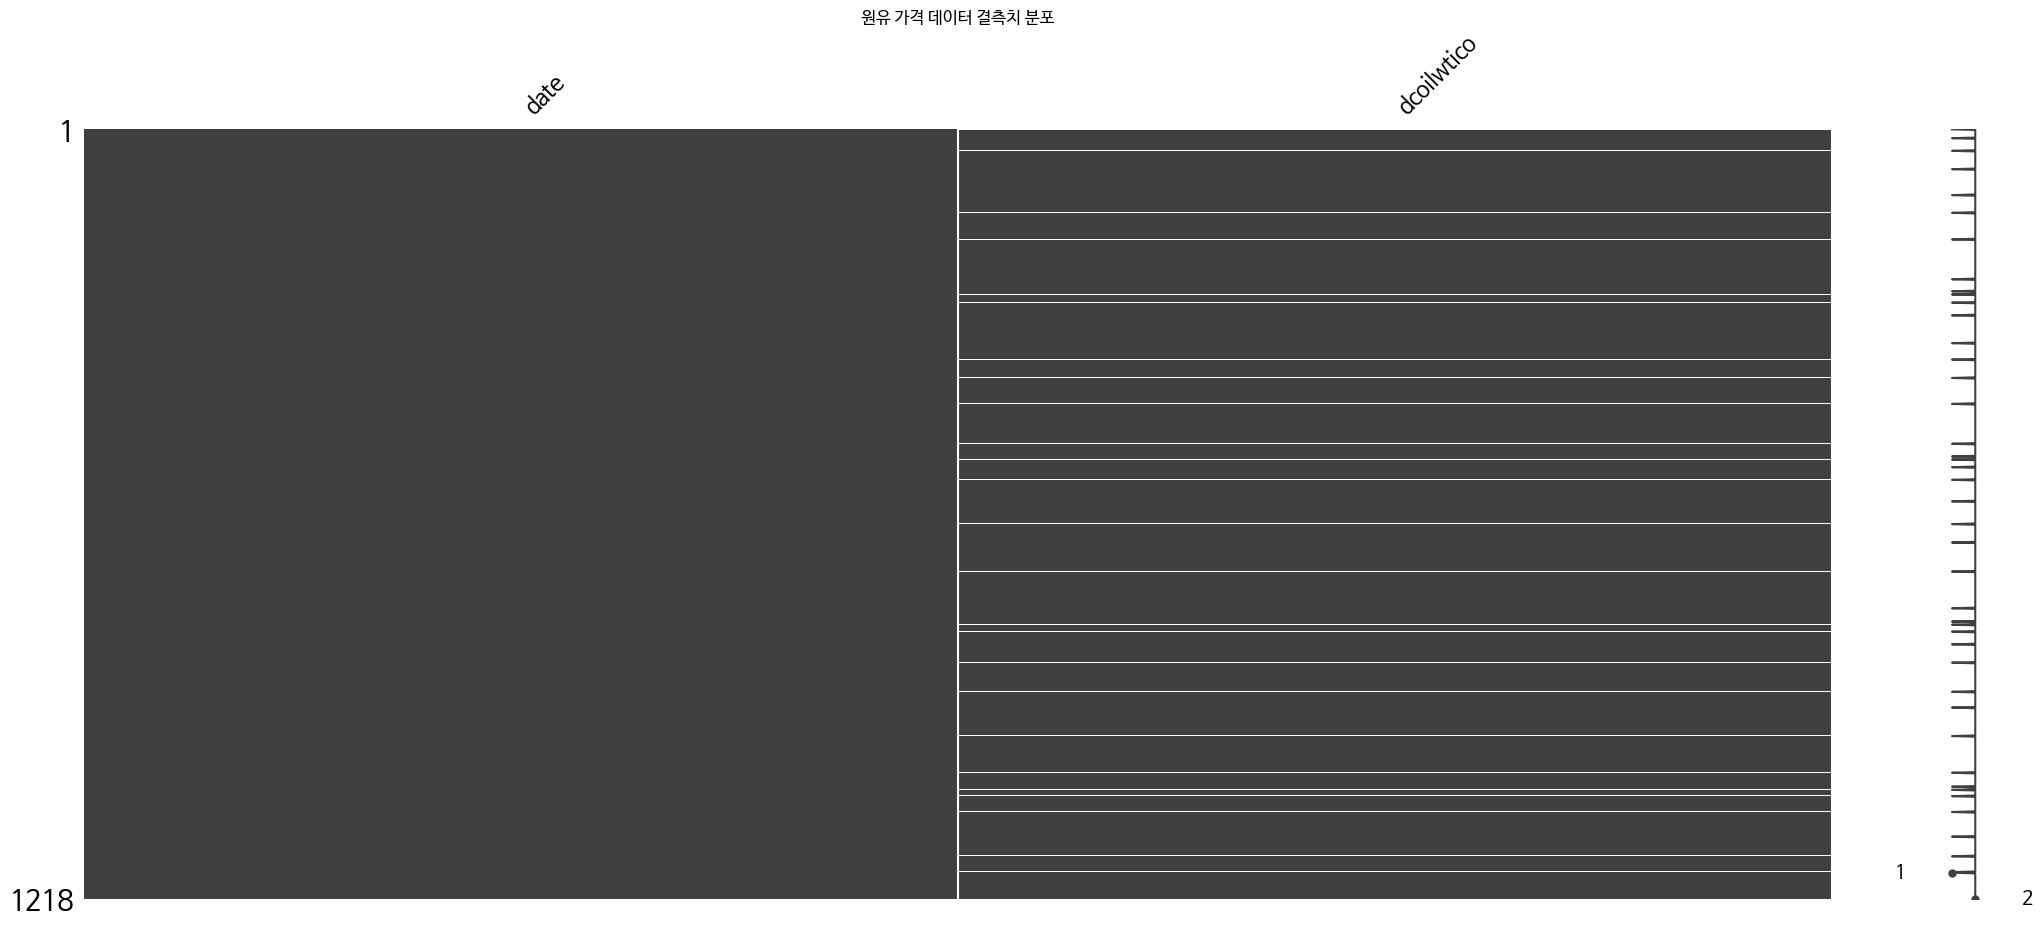

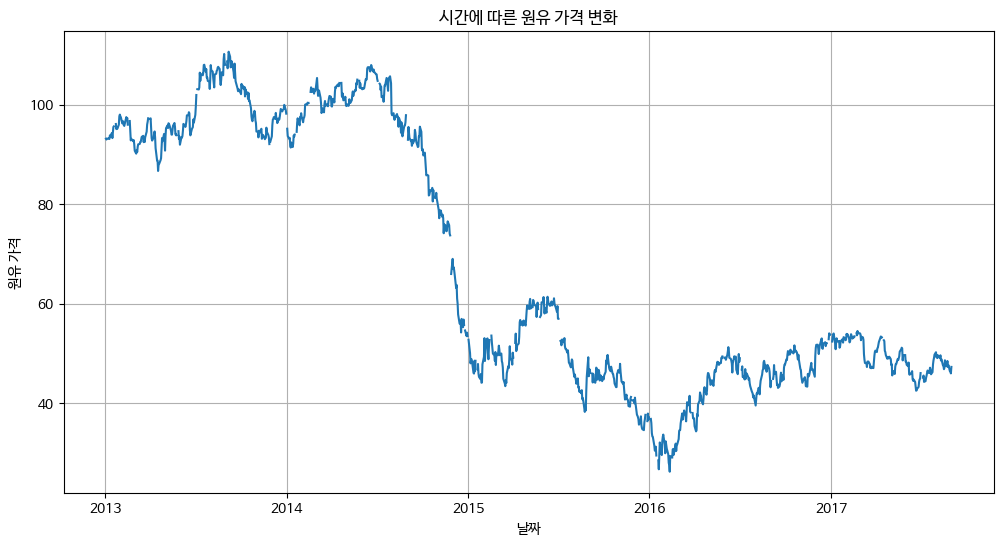

In [15]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico']) # 선형그래프
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

In [19]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


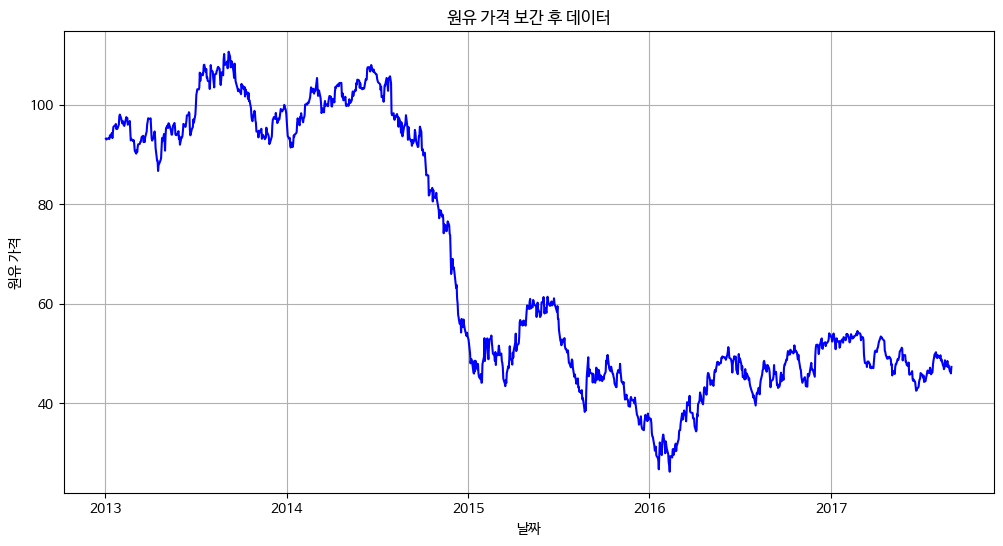

In [16]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


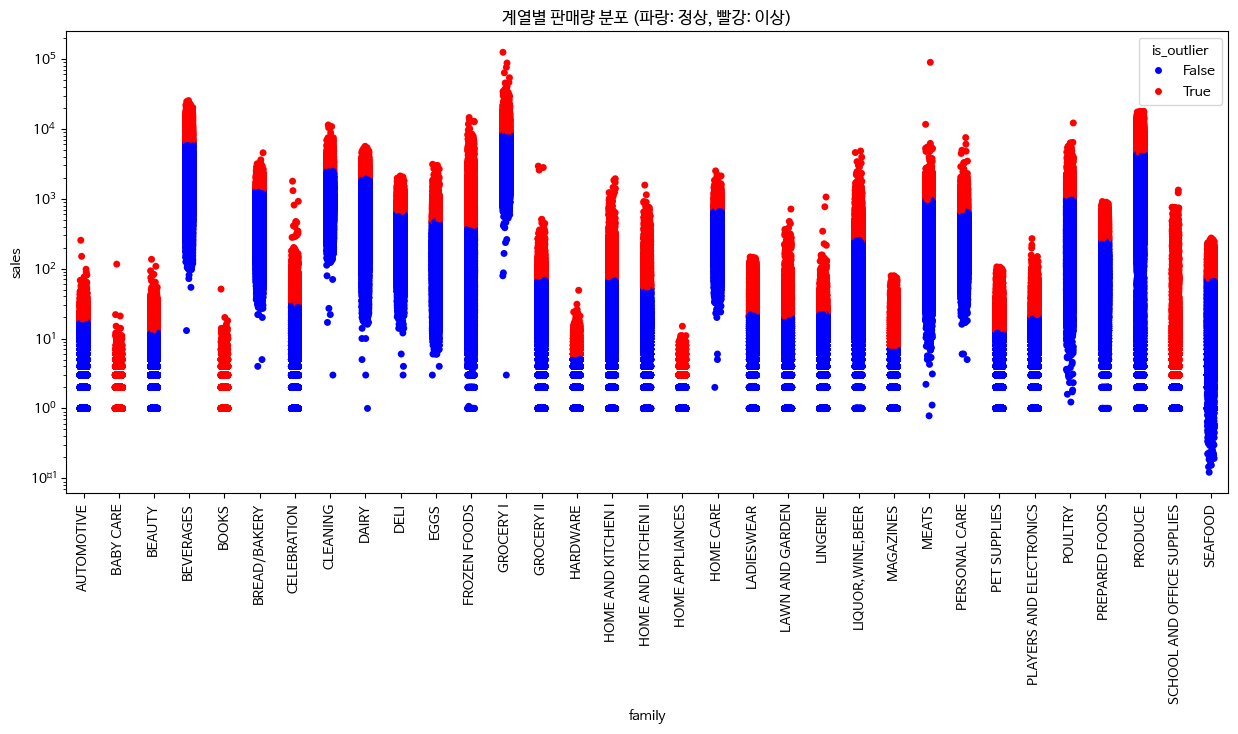

In [23]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(
    lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
)
family_bounds

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']
total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [ ]:
upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()


changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

### 날짜 데이터 처리

In [ ]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경



train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철


print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

In [ ]:
## 요일별 평균 판매량을 계산

## 요일 출력값 변경

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [ ]:
## 판매, 거래 데이터 통합


## 매장 데이터 통합


## 원유 데이터 통합


print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())